In [249]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
from datetime import datetime
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline
load_dotenv()

True

In [250]:
# Set amount of BTC & ETH
btc_amount=1.2
eth_amount=5.3

In [251]:
 # Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CADn"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [252]:
# Change format of API for JSON
btc_url=btc_url+"?format=json"
eth_url=eth_url+"?format=json"
btc_response=requests.get(btc_url)
eth_response=requests.get(eth_url)

In [253]:
# Get content
btc_content=btc_response.content
eth_content=eth_response.content
print(btc_content)
print(eth_content)

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18606850,\n\t\t\t"total_supply": 18606850,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 29356.0000000000000000,\n\t\t\t\t\t"volume_24h": 71047965817,\n\t\t\t\t\t"market_cap": 555251357427,\n\t\t\t\t\t"percentage_change_1h": -3.8660618759574100,\n\t\t\t\t\t"percentage_change_24h": -16.0687504767024000,\n\t\t\t\t\t"percentage_change_7d": -25.1759145147435000,\n\t\t\t\t\t"percent_change_1h": -3.8660618759574100,\n\t\t\t\t\t"percent_change_24h": -16.0687504767024000,\n\t\t\t\t\t"percent_change_7d": -25.1759145147435000\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1611277769\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1611277769,\n\t\t"num_cryptocurrencies": 1383,\n\t\t"error": null\n\t}\n}'
b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\

In [254]:
# Formatting as json
btc_data=btc_response.json()
eth_data=eth_response.json()

In [255]:
# Add indents to JSON and output to screen
print(json.dumps(btc_data,indent=4))
print(json.dumps(eth_data,indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18606850,
            "total_supply": 18606850,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 29356.0,
                    "volume_24h": 71047965817,
                    "market_cap": 555251357427,
                    "percentage_change_1h": -3.86606187595741,
                    "percentage_change_24h": -16.0687504767024,
                    "percentage_change_7d": -25.1759145147435,
                    "percent_change_1h": -3.86606187595741,
                    "percent_change_24h": -16.0687504767024,
                    "percent_change_7d": -25.1759145147435
                }
            },
            "last_updated": 1611277769
        }
    },
    "metadata": {
        "timestamp": 1611277769,
        "num_cry

In [256]:
#Get current BTC & ETH price
btc_price=btc_data['data']['1']['quotes']['USD']['price']
eth_price=eth_data['data']['1027']['quotes']['USD']['price']
print(btc_price)
print(eth_price)

29356.0
1068.72


In [257]:
#Calculate current value of BTC & ETH
btc_current_value=btc_amount*btc_price
eth_current_value=eth_amount*eth_price

In [258]:
#Print current value of BTC & ETH 
print(f"The current value of your {btc_amount} BTC is ${btc_current_value:0.2f}")
print(f"The current value of your {eth_amount} ETH is ${eth_current_value:0.2f}")

The current value of your 1.2 BTC is $35227.20
The current value of your 5.3 ETH is $5664.22


In [259]:
#Collective Investments Data using Alpaca 

In [260]:
#Set amount of shares
my_agg=200
my_spy=50

In [261]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [262]:
#Verify Alpaca key &secret key 
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")



Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [263]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,alpaca_secret_key,
 api_version="v2")

In [264]:
# Format current date as ISO format
start = pd.Timestamp("2021-01-21", tz="America/New_York").isoformat()
end=pd.Timestamp("2021-01-21", tz="America/New_York").isoformat()
print(end)

2021-01-21T00:00:00-05:00


In [265]:
 # Set the tickers
tickers = ["SPY", "AGG"]

In [266]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [267]:
 # Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end
).df

# Display sample data
df_portfolio

AGG                                        SPY  \
                             open      high     low   close   volume    open   
2021-01-21 00:00:00-05:00  117.22  117.2985  117.14  117.26  5801029  384.49   

                                                            
                             high     low  close    volume  
2021-01-21 00:00:00-05:00  384.95  383.25  384.2  41800991

In [268]:
 # Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of AGG and SPY
df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices

,AGG,SPY
2021-01-21,117.26,384.2


In [269]:
# Pick AGG and SPY close prices
agg_close_price=df_closing_prices["AGG"][0]
spy_close_price=df_closing_prices["SPY"][0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")
# Compute the current value of shares


Current AGG closing price: $117.26
Current SPY closing price: $384.2


In [270]:
#Calculate value of shares
agg_value=my_agg*agg_close_price
spy_value=my_spy*spy_close_price


In [271]:
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $19210.00
The current value of your 200 AGG shares is $23452.00


In [272]:
#Saving Health Analysis 

In [273]:
#Set Monthly income and Total crypto & stocks value
monthly_income=12000
total_crypto_value=btc_current_value+eth_current_value
total_stocks_value=spy_value+agg_value
print(total_crypto_value)
print(total_stocks_value)

40891.416
42662.0


In [274]:
#Create DataFrame with crypto and stocks values 
values=[total_crypto_value,total_stocks_value]
df_savings= pd.DataFrame(values,columns=["amount"],index=["crypto","stocks"])
df_savings

,amount
crypto,40891.416
stocks,42662.000


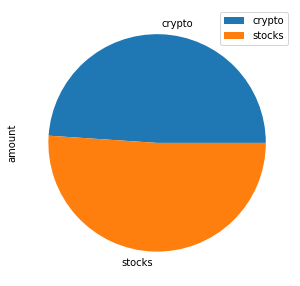

In [275]:
#plot pie chart of Crypto and Stocks savings
df_savings.plot.pie (y="amount",figsize=(5,5))

In [276]:
 # Set ideal emergency fund
emergency_fund = monthly_income * 3
print(emergency_fund)

36000


In [277]:
#Calculate total savings
total_savings=total_crypto_value+total_stocks_value
print(total_savings)

83553.416


In [278]:
#Create IF statement and loop to compare emerency fund and total savings 
if total_savings>emergency_fund:
    print(' Congratulations! You have enough money in your emergency fund.')
elif total_savings==emergency_fund:
    print(' Congratulations! You have reached your finacnial goal.')
else: print(f"You need ${emergency_fund-total_savings:0.2f} to reach your goal")

 Congratulations! You have enough money in your emergency fund.


In [181]:
#Part 2 Retirement Planning
#MonteCarlo simulation

In [185]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-01-21', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-01-21', tz='America/New_York').isoformat()

In [201]:
 # Get current closing prices for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data

AGG                                       \
                             open      high       low   close   volume   
2016-01-21 00:00:00-05:00  109.08  109.0800  108.7400  108.78  6927926   
2016-01-22 00:00:00-05:00  108.72  108.8500  108.5850  108.82  2980878   
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631   
2016-01-27 00:00:00-05:00  108.91  109.0100  108.7200  108.95  1531148   
...                           ...       ...       ...     ...      ...   
2021-01-14 00:00:00-05:00  117.37  117.4500  117.0800  117.15  5311077   
2021-01-15 00:00:00-05:00  117.34  117.3600  117.1800  117.26  4776104   
2021-01-19 00:00:00-05:00  117.27  117.4200  117.2200  117.41  5057257   
2021-01-20 00:00:00-05:00  117.35  117.4300  117.3100  117.40  3877734   
2021-01-21 00:00:00-05:00  117.22  117.2985  117.1400  117.26  5801029   

                              SPY                                     
                             open    high     low   close     volume  
2016-01-21 00:00:00-05:00  186.21  188.87  184.64  186.68  154918462  
2016-01-22 00:00:00-05:00  189.78  190.76  188.88  190.49  132418951  
2016-01-25 00:00:00-05:00  189.93  190.15  187.41  187.66   99219694  
2016-01-26 00:00:00-05:00  188.42  190.53  188.02  190.18  115312517  
2016-01-27 00:00:00-05:00  189.58  191.56  187.06  188.12  157060622  
...                           ...     ...     ...     ...        ...  
2021-01-14 00:00:00-05:00  380.59  381.13  378.10  378.45   41045335  
2021-01-15 00:00:00-05:00  376.72  377.58  373.70  375.68   78405054  
2021-01-19 00:00:00-05:00  378.34  379.23  376.75  378.63   42257108  
2021-01-20 00:00:00-05:00  381.11  384.79  380.69  383.86   53064901  
2021-01-21 00:00:00-05:00  384.49  384.95  383.25  384.20   41800991  

[1260 rows x 10 columns]

In [187]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [211]:
# Configuring a Monte Carlo simulation to forecast thirty years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [248]:
#print Data
MC_thirtyyear.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
2016-01-21 00:00:00-05:00  109.08  109.080  108.7400  108.78  6927926   
2016-01-22 00:00:00-05:00  108.72  108.850  108.5850  108.82  2980878   
2016-01-25 00:00:00-05:00  108.95  108.980  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.995  108.7699  108.90  2023631   
2016-01-27 00:00:00-05:00  108.91  109.010  108.7200  108.95  1531148   

                                           SPY                          \
                          daily_return    open    high     low   close   
2016-01-21 00:00:00-05:00          NaN  186.21  188.87  184.64  186.68   
2016-01-22 00:00:00-05:00     0.000368  189.78  190.76  188.88  190.49   
2016-01-25 00:00:00-05:00    -0.000276  189.93  190.15  187.41  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.53  188.02  190.18   
2016-01-27 00:00:00-05:00     0.000459  189.58  191.56  187.06  188.12   

                                                   
                              volume daily_return  
2016-01-21 00:00:00-05:00  154918462          NaN  
2016-01-22 00:00:00-05:00  132418951     0.020409  
2016-01-25 00:00:00-05:00   99219694    -0.014856  
2016-01-26 00:00:00-05:00  115312517     0.013429  
2016-01-27 00:00:00-05:00  157060622    -0.010832

In [213]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004434,0.993419,0.994880,0.999869,0.996356,1.000306,1.005985,1.004429,1.001149,1.000939,...,1.008598,0.996093,1.006458,1.002003,0.994158,0.997500,1.001254,1.004188,0.998023,1.003937
2,1.006165,0.991907,0.995386,1.006182,0.997582,0.998162,1.018663,1.001891,0.995550,0.997482,...,0.994571,0.991466,1.009201,1.002770,0.991726,0.994162,0.996562,0.998772,1.004879,1.014047
3,1.009875,0.997490,0.992694,1.003104,1.002841,0.999912,1.028015,0.996987,0.993159,0.997783,...,0.989488,0.993873,1.011528,1.001975,0.990787,0.995766,0.985211,1.003343,1.004738,1.013148
4,1.008532,0.996942,0.992901,0.999648,0.997220,1.000880,1.032190,1.004720,0.996851,0.987942,...,1.005262,0.994080,1.018214,0.999703,0.982604,0.992358,0.983090,1.003495,1.006838,1.013789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.085795,8.190997,16.290332,10.989019,6.192964,19.652610,8.675609,14.072934,11.919776,8.776641,...,10.825759,5.168025,6.302537,12.241569,8.312975,6.168509,11.936369,4.658618,15.789371,5.992345
7557,6.064707,8.184562,16.363349,10.942209,6.201608,19.659623,8.632448,14.062441,11.949122,8.811109,...,10.963476,5.201711,6.304100,12.284986,8.288688,6.169441,12.011084,4.599824,15.883949,6.030076
7558,6.071553,8.082816,16.236016,10.958789,6.203505,19.729765,8.654936,14.001870,11.929516,8.724820,...,10.930938,5.179703,6.280778,12.375889,8.372187,6.135383,12.011678,4.597177,15.924675,6.036480
7559,6.057248,8.166836,16.170410,10.914488,6.201569,19.763298,8.662395,14.038278,11.974017,8.718454,...,10.891500,5.192520,6.252901,12.308142,8.444726,6.132682,12.087070,4.597026,15.922287,5.985889


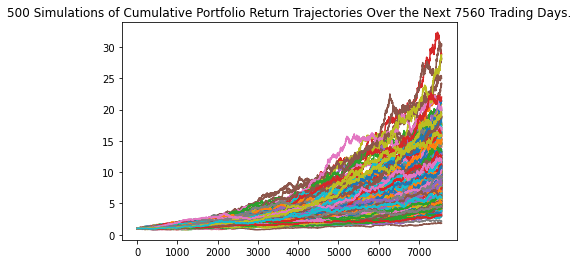

In [214]:
# Plot simulation outcomes
line_plot=MC_thirtyyear.plot_simulation()

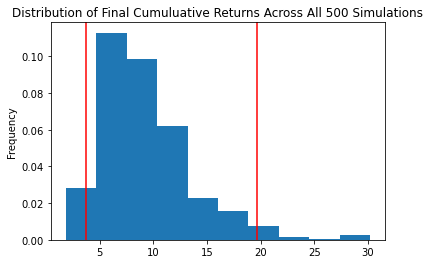

In [215]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

In [216]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              9.354677
std               4.266364
min               1.857097
25%               6.398712
50%               8.501786
75%              11.314527
max              30.187690
95% CI Lower      3.714744
95% CI Upper     19.622951
Name: 7560, dtype: float64


In [218]:
# Set initial investment
initial_investment = 20000

ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $37147.44 and $196229.51


In [219]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $111442.31 and $588688.54
